<a href="https://colab.research.google.com/github/vinhnemo/LIFAS/blob/master/spoken-language-detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np # linear algebra
np.random.seed(1337) #reproducibility
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [28]:
import os
import pandas as pd
import soundfile as sf
import scipy.signal as signal
import matplotlib.pyplot as plt
import gc
import IPython.display as ipd 

In [2]:
! pip install -q kaggle

In [3]:
 ! mkdir ~/.kaggle

In [15]:
! cp /content/kaggle.json ~/.kaggle/

In [16]:
! chmod 600 ~/.kaggle/kaggle.json

In [17]:
!ls -l ~/.kaggle

total 4
-rw------- 1 root root 64 Oct  5 14:10 kaggle.json


In [18]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              235KB  2021-10-01 17:39:01          13193  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           7952  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           3473  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           3068  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Wo

In [19]:
!kaggle datasets download -d toponowicz/spoken-language-identification

100% 14.9G/14.9G [02:52<00:00, 129MB/s]
100% 14.9G/14.9G [02:52<00:00, 92.8MB/s]


In [20]:
! mkdir input

In [21]:
! unzip /content/spoken-language-identification.zip -d /content/input

Streaming output truncated to the last 5000 lines.
  inflating: /content/input/train/train/es_m_b53274d3ef7996a22d6ec929c1869804.fragment16.pitch5.flac  
  inflating: /content/input/train/train/es_m_b53274d3ef7996a22d6ec929c1869804.fragment16.pitch6.flac  
  inflating: /content/input/train/train/es_m_b53274d3ef7996a22d6ec929c1869804.fragment16.pitch7.flac  
  inflating: /content/input/train/train/es_m_b53274d3ef7996a22d6ec929c1869804.fragment16.pitch8.flac  
  inflating: /content/input/train/train/es_m_b53274d3ef7996a22d6ec929c1869804.fragment16.speed1.flac  
  inflating: /content/input/train/train/es_m_b53274d3ef7996a22d6ec929c1869804.fragment16.speed2.flac  
  inflating: /content/input/train/train/es_m_b53274d3ef7996a22d6ec929c1869804.fragment16.speed3.flac  
  inflating: /content/input/train/train/es_m_b53274d3ef7996a22d6ec929c1869804.fragment16.speed4.flac  
  inflating: /content/input/train/train/es_m_b53274d3ef7996a22d6ec929c1869804.fragment16.speed5.flac  
  inflating: /content/

In [25]:
train_path = '/content/input/train/train/'
test_path = '/content/input/test/test/'

In [23]:
filename = 'de_f_0809fd0642232f8c85b0b3d545dc2b5a.fragment1.flac'

In [29]:
data, samplerate = sf.read(train_path+filename)

In [31]:
import os
print(os.listdir('/content/input'))
import pandas as pd

['test', 'train']


In [32]:
import gc
gc.collect()

171

In [33]:
data.shape

(220500,)

In [34]:
#el flac cargado
data[:10]

array([-0.03903198, -0.03997803, -0.05319214, -0.06002808, -0.0531311 ,
       -0.04608154, -0.04348755, -0.02947998, -0.02307129, -0.02459717])

In [35]:
samplerate

22050

In [36]:
ipd.Audio(train_path+filename)

In [ ]:
#freq, time, Sxx = signal.spectrogram(data, samplerate, scaling='spectrum')
#plt.pcolormesh(time, freq, Sxx)

## add axis labels
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')

Text(0.5, 0, 'Time [sec]')

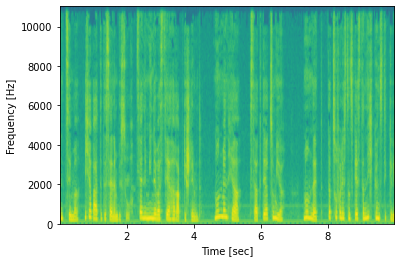

In [37]:
Pxx, freqs, bins, im = plt.specgram(data, Fs=samplerate)

# add axis labels
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

Text(0.5, 0, 'Time in samples')

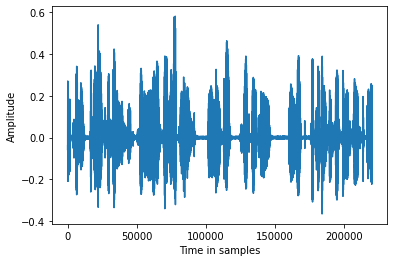

In [38]:
plt.plot(data)

# add axis labels
plt.ylabel('Amplitude')
plt.xlabel('Time in samples')

cargamos las labels de idiomas en label y label_t

In [39]:
filename[:2]

'de'

In [40]:
#para train path
label = []
for filename in os.listdir(train_path):
    label.append(filename[:2]) #es [:2] porque el idioma esta en los dos primeros elementos

In [41]:
#para test path
label_t = []
for filename in os.listdir(test_path):
    label_t.append(filename[:2])

In [42]:
print(len(label))
print(len(label_t))

73080
540


In [ ]:
# gender = []
# for filename in os.listdir(train_path):
#     gender.append('male' if filename[3:4]=='m' else 'female')

In [ ]:
# gender_t = []
# for filename in os.listdir(test_path):
#     gender_t.append('male' if filename[3:4]=='m' else 'female')

In [43]:
file = []
for filename in os.listdir(train_path):
    file.append(filename)

In [44]:
file_t = []
for filename in os.listdir(test_path):
    file_t.append(filename)

In [45]:
Label = pd.DataFrame(label,columns=['Language'])

Está balanceado el dataset:

In [46]:
Label['Language'].value_counts()

en    24360
es    24360
de    24360
Name: Language, dtype: int64

In [47]:
data = {'filename':file,
       'languange':label}

In [48]:
data_t = {'filename':file_t,
       'languange':label_t}

In [49]:
#df es el dataframe de train
df = pd.DataFrame(data)

In [50]:
#df_t es el dataframe de test
df_t = pd.DataFrame(data_t)

In [51]:
df['filename'][0]

'de_m_2cfa348b2b6852e38637a4225158678d.fragment24.noise8.flac'

In [52]:
#extraida de https://github.com/tomasz-oponowicz/spoken_language_identification
def generate_fb_and_mfcc(signal, sample_rate):

    # Pre-Emphasis
    pre_emphasis = 0.97
    emphasized_signal = np.append(
        signal[0],
        signal[1:] - pre_emphasis * signal[:-1])

    # Framing
    frame_size = 0.025
    frame_stride = 0.01

    # Convert from seconds to samples
    frame_length, frame_step = (
        frame_size * sample_rate,
        frame_stride * sample_rate)
    signal_length = len(emphasized_signal)
    frame_length = int(round(frame_length))
    frame_step = int(round(frame_step))

    # Make sure that we have at least 1 frame
    num_frames = int(
        np.ceil(float(np.abs(signal_length - frame_length)) / frame_step))

    pad_signal_length = num_frames * frame_step + frame_length
    z = np.zeros((pad_signal_length - signal_length))

    # Pad Signal to make sure that all frames have equal
    # number of samples without truncating any samples
    # from the original signal
    pad_signal = np.append(emphasized_signal, z)

    indices = (
        np.tile(np.arange(0, frame_length), (num_frames, 1)) +
        np.tile(
            np.arange(0, num_frames * frame_step, frame_step),
            (frame_length, 1)
        ).T
    )
    frames = pad_signal[indices.astype(np.int32, copy=False)]

    # Window
    frames *= np.hamming(frame_length)

    # Fourier-Transform and Power Spectrum
    NFFT = 512

    # Magnitude of the FFT
    mag_frames = np.absolute(np.fft.rfft(frames, NFFT))

    # Power Spectrum
    pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))

    # Filter Banks
    nfilt = 40

    low_freq_mel = 0

    # Convert Hz to Mel
    high_freq_mel = (2595 * np.log10(1 + (sample_rate / 2) / 700))

    # Equally spaced in Mel scale
    mel_points = np.linspace(low_freq_mel, high_freq_mel, nfilt + 2)

    # Convert Mel to Hz
    hz_points = (700 * (10**(mel_points / 2595) - 1))
    bin = np.floor((NFFT + 1) * hz_points / sample_rate)

    fbank = np.zeros((nfilt, int(np.floor(NFFT / 2 + 1))))
    for m in range(1, nfilt + 1):
        f_m_minus = int(bin[m - 1])   # left
        f_m = int(bin[m])             # center
        f_m_plus = int(bin[m + 1])    # right

        for k in range(f_m_minus, f_m):
            fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
        for k in range(f_m, f_m_plus):
            fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])
    filter_banks = np.dot(pow_frames, fbank.T)

    # Numerical Stability
    filter_banks = np.where(
        filter_banks == 0,
        np.finfo(float).eps,
        filter_banks)

    # dB
    filter_banks = 20 * np.log10(filter_banks)

    # MFCCs
    # num_ceps = 12
    # cep_lifter = 22

    # ### Keep 2-13
    # mfcc = dct(
    #     filter_banks,
    #     type=2,
    #     axis=1,
    #     norm='ortho'
    # )[:, 1 : (num_ceps + 1)]

    # (nframes, ncoeff) = mfcc.shape
    # n = np.arange(ncoeff)
    # lift = 1 + (cep_lifter / 2) * np.sin(np.pi * n / cep_lifter)
    # mfcc *= lift
    #filter_banks -= (np.mean(filter_banks, axis=0) + 1e-8)
    return filter_banks

In [53]:
from sklearn.model_selection import train_test_split

In [ ]:
### Splitting 73000 audio files to get enough files for training and for RAM

In [54]:
X_train,X_test,y_train,y_test = train_test_split(df,df['languange'],stratify = df['languange'],test_size = 0.5,random_state = 0)
print(X_train['languange'].value_counts())
print(X_test['languange'].value_counts())

en    12180
de    12180
es    12180
Name: languange, dtype: int64
en    12180
de    12180
es    12180
Name: languange, dtype: int64


In [55]:
X_train,X_test,y_train,y_test = train_test_split(X_train,X_train['languange'],stratify = X_train['languange'],test_size = 0.5,random_state = 0)
print(X_train['languange'].value_counts())
print(X_test['languange'].value_counts())

es    6090
en    6090
de    6090
Name: languange, dtype: int64
es    6090
en    6090
de    6090
Name: languange, dtype: int64


In [56]:
X_train,X_test,y_train,y_test = train_test_split(X_train,X_train['languange'],stratify = X_train['languange'],test_size = 0.5,random_state = 0)
print(X_train['languange'].value_counts())
print(X_test['languange'].value_counts())

en    3045
de    3045
es    3045
Name: languange, dtype: int64
en    3045
de    3045
es    3045
Name: languange, dtype: int64


In [57]:
X_train,X_test,y_train,y_test = train_test_split(X_train,X_train['languange'],stratify = X_train['languange'],test_size = 0.6,random_state = 0)
print(X_train['languange'].value_counts())
print(X_test['languange'].value_counts())

en    1218
de    1218
es    1218
Name: languange, dtype: int64
en    1827
de    1827
es    1827
Name: languange, dtype: int64


In [58]:
X_train['filename'].values[:2]

array(['en_f_10134f409d9b7b0b95fed6e025febcad.fragment28.speed7.flac',
       'en_m_6a5535d7512259e7bef76ff997750873.fragment2.speed4.flac'],
      dtype=object)

In [59]:
X_train.head()

,filename,languange
49186,en_f_10134f409d9b7b0b95fed6e025febcad.fragment...,en
71892,en_m_6a5535d7512259e7bef76ff997750873.fragment...,en
47099,en_f_9a47e3d56398b8108f59385aab8bbe87.fragment...,en
12277,en_f_5dff2b7b319207972450f91d569b5a16.fragment...,en
58784,es_f_56ef0bde6c92a0100da23cdd39a8a112.fragment...,es


In [60]:
#reseteamos los indices
X_train = X_train.reset_index(drop = True)
X_train.head()

,filename,languange
0,en_f_10134f409d9b7b0b95fed6e025febcad.fragment...,en
1,en_m_6a5535d7512259e7bef76ff997750873.fragment...,en
2,en_f_9a47e3d56398b8108f59385aab8bbe87.fragment...,en
3,en_f_5dff2b7b319207972450f91d569b5a16.fragment...,en
4,es_f_56ef0bde6c92a0100da23cdd39a8a112.fragment...,es


In [61]:
gc.collect()

243

In [62]:
series = []
length = []
for filename in X_train['filename'].values:
    flac, samplerate = sf.read(train_path+filename)
    series.append(flac)
    length.append(samplerate)

In [63]:
X_train['Series'] = series
X_train['Length'] = length
X_train.head(20)

,filename,languange,Series,Length
0,en_f_10134f409d9b7b0b95fed6e025febcad.fragment...,en,"[-0.00787353515625, -0.00494384765625, 0.00350...",22050
1,en_m_6a5535d7512259e7bef76ff997750873.fragment...,en,"[0.000457763671875, 0.000213623046875, 0.00039...",22050
2,en_f_9a47e3d56398b8108f59385aab8bbe87.fragment...,en,"[0.000518798828125, 0.000457763671875, 0.00018...",22050
3,en_f_5dff2b7b319207972450f91d569b5a16.fragment...,en,"[-0.00738525390625, -0.0057373046875, 0.008514...",22050
4,es_f_56ef0bde6c92a0100da23cdd39a8a112.fragment...,es,"[0.0108642578125, 0.015045166015625, 0.0177612...",22050
5,en_m_d2f13c7f37ecec67df0f46408c224bc1.fragment...,en,"[-0.00390625, -0.017822265625, -0.017059326171...",22050
6,es_m_d7128fe46e362acdb2271a154e3206ae.fragment...,es,"[0.000732421875, 0.00091552734375, 0.000793457...",22050
7,es_f_47bd2e6178465cd745c86c9db5ffe447.fragment...,es,"[-0.009185791015625, -0.0032958984375, 0.00262...",22050
8,es_m_768526f634547e2b45fd84556ecd70f6.fragment...,es,"[-0.00604248046875, -0.00274658203125, 0.00042...",22050
9,en_f_25836f5c38f5151611da3e2be4cfd20f.fragment...,en,"[-0.000274658203125, -0.00042724609375, -0.000...",22050


In [64]:
len(X_train)

3654

In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [66]:
##### Clearing the memory and reusing the notebook
gc.collect()

415

In [67]:
#genero filter banks y mfccs para train
MFCC_array = []
for i in range(0,len(X_train)):
    MFCC = generate_fb_and_mfcc(X_train['Series'][i], X_train['Length'][i])
    MFCC_sc = sc.fit_transform(MFCC)
    MFCC_array.append(MFCC_sc)
MFCC_array = np.array(MFCC_array)  

In [68]:
np.save('/content/working/MFCC_data',MFCC_array)

In [69]:
#repito todo para test
series_t = []
length_t = []
for filename in df_t['filename'].values:
    flac, samplerate = sf.read(test_path+filename)
    series_t.append(flac)
    length_t.append(samplerate)

In [70]:
df_t['Series'] = series_t
df_t['Length'] = length_t
df_t.head()

,filename,languange,Series,Length
0,de_m_923551d571cc437382d0294dda2dd0aa.fragment...,de,"[-0.002166748046875, -0.0118408203125, -0.0043...",22050
1,de_f_63f5b79c76cf5a1a4bbd1c40f54b166e.fragment...,de,"[-0.0963134765625, -0.1126708984375, -0.130065...",22050
2,de_m_923551d571cc437382d0294dda2dd0aa.fragment...,de,"[-0.000823974609375, -0.000213623046875, 0.000...",22050
3,de_m_923551d571cc437382d0294dda2dd0aa.fragment...,de,"[0.000396728515625, 6.103515625e-05, -0.000274...",22050
4,es_m_08111ce8d6a7ebc6cd2c27e62a3d98f0.fragment...,es,"[0.22021484375, 0.1990966796875, 0.17272949218...",22050


In [71]:
##genero filter banks y mfccs para test, el que tiene 540 items
MFCC_array_t = []
for i in range(0,len(df_t)):
    MFCC = generate_fb_and_mfcc(df_t['Series'][i], df_t['Length'][i])
    MFCC_sc = sc.fit_transform(MFCC)
    MFCC_array_t.append(MFCC_sc)
MFCC_array_t = np.array(MFCC_array_t)   

In [72]:
np.save('/content/working/MFCC_data_t',MFCC_array_t)

In [74]:
#language dummies tiene los one hot encoding para X_train
#language dummies_t tiene los one hot encoding para df_t; i.e. [0, 1, 0], etc
language_dummies = pd.get_dummies(X_train['languange'])
language_dummies_t = pd.get_dummies(df_t['languange'])
np.save('/content/working/language_dummy',language_dummies.values)
np.save('/content/working/language_dummy_t',language_dummies_t.values)

In [75]:
import librosa
import librosa.display

In [76]:
#Sample audio feature engineering 

In [77]:
MFCC_array = np.load('/content/working/MFCC_data.npy')


In [78]:
language_dummies = np.load('/content/working/language_dummy.npy')
language_dummies_t = np.load('/content/working/language_dummy_t.npy')

In [79]:
language_dummies_t[:5]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1]], dtype=uint8)

In [80]:
X_train_MFCC,X_test_MFCC,y_train_MFCC,y_test_MFCC = train_test_split(MFCC_array,language_dummies,stratify = language_dummies,test_size = 0.10,random_state = 0)

In [81]:
X_train_MFCC.shape

(3288, 1000, 40)

In [82]:
X_train_MFCC = X_train_MFCC.reshape(-1,1000,40,1)

In [83]:
X_test_MFCC = X_test_MFCC.reshape(-1,1000,40,1)

In [84]:
y_train_MFCC 
y_test_MFCC
len(X_train_MFCC)

3288

In [89]:
!pip install -U tensorflow


In [90]:
!python -m pip show tensorflow


Name: tensorflow
Version: 2.6.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: keras-preprocessing, tensorboard, wheel, numpy, absl-py, opt-einsum, typing-extensions, termcolor, h5py, gast, protobuf, grpcio, google-pasta, tensorflow-estimator, wrapt, keras, astunparse, clang, flatbuffers, six
Required-by: kapre


In [96]:
from sklearn import preprocessing
from sklearn.metrics import classification_report,confusion_matrix 

from keras.models import Model, load_model, Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten
from keras.layers import Dropout, Input, Activation
from tensorflow.keras.optimizers import Nadam, SGD, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
from keras.models import load_model
from keras.layers import BatchNormalization
from keras import regularizers


In [101]:
input_shape = (1000,40,1)
model = Sequential()
# model.add(Conv2D(32,(3, 3),strides=(1, 1),padding='same',kernel_regularizer=regularizers.l2(0.0007),
#         input_shape=input_shape,data_format = 'channels_last'))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))
# model.add(Conv2D(64,(3, 3),strides=(1, 1),padding='same',kernel_regularizer=regularizers.l2(0.0007)))
#         #kernel_regularizer=regularizers.l2(0.001)))
# model.add(Activation('relu'))
# #model.add(Dropout(0.4))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))
# model.add(AveragePooling2D(pool_size=(3, 3),strides=(2, 2),padding='same'))
# model.add(Flatten())
# model.add(Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.0007)))       # kernel_regularizer=regularizers.l2(0.001)))
# model.add(Dropout(0.40))
# model.add(BatchNormalization())
# model.add(Dense(3))
# model.add(Activation('softmax'))

#---------------------------- NEW MODEL

model.add(Conv2D(32,(7, 7), activation='relu', padding='valid', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=2, padding='same'))
model.add(Conv2D(64,(5,5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=2, padding='same'))
model.add(Conv2D(128,(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=2, padding='same'))
model.add(Conv2D(256,(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=2, padding='same'))
model.add(Conv2D(512,(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=2, padding='same'))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))


#sgd = SGD(lr=0.01, decay=1, momentum=0.0, nesterov=False)
#sgd = sgd(lr=0.01, decay=1e-6, momentum=0.0, nesterov=False)
#adam = Adam(lr=0.01, decay=1e-6)
import math
from keras.callbacks import LearningRateScheduler
adam = Adam()
def step_decay(epoch):
    # 00158 = 90.4%
	initial_lrate = 0.00158
	drop = 0.9
	epochs_drop = 1
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate


model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])



checkpoint = ModelCheckpoint(
                '/content/working/model.h5',
                monitor='val_accuracy',
                verbose=0,
                save_best_only=True,
                mode='max'
                )

lrate = LearningRateScheduler(step_decay)
#es = EarlyStopping(monitor='val_loss',mode = 'max')
model.fit(
                X_train_MFCC,
                y_train_MFCC,
                epochs=60,
                callbacks=[checkpoint, lrate],
                verbose=1,
                validation_data=(X_test_MFCC, y_test_MFCC),
                batch_size=32)

Epoch 1/60
103/103 [==============================] - 6s 45ms/step - loss: 1.3481 - accuracy: 0.4824 - val_loss: 0.9711 - val_accuracy: 0.5355
Epoch 2/60
103/103 [==============================] - 4s 41ms/step - loss: 0.5546 - accuracy: 0.8017 - val_loss: 1.3012 - val_accuracy: 0.6066
Epoch 3/60
103/103 [==============================] - 4s 42ms/step - loss: 0.3008 - accuracy: 0.8942 - val_loss: 0.5738 - val_accuracy: 0.8060
Epoch 4/60
103/103 [==============================] - 4s 42ms/step - loss: 0.1690 - accuracy: 0.9364 - val_loss: 1.5412 - val_accuracy: 0.6557
Epoch 5/60
103/103 [==============================] - 4s 42ms/step - loss: 0.1302 - accuracy: 0.9510 - val_loss: 0.4513 - val_accuracy: 0.8525
Epoch 6/60
103/103 [==============================] - 4s 42ms/step - loss: 0.0531 - accuracy: 0.9827 - val_loss: 0.2788 - val_accuracy: 0.8798
Epoch 7/60
103/103 [==============================] - 4s 41ms/step - loss: 0.0255 - accuracy: 0.9924 - val_loss: 0.0754 - val_accuracy: 0.9672

no es el peso, no son las capas, no es la reg l1 ni l2

In [102]:
model = load_model('/content/working/model.h5')

In [103]:
model.evaluate(X_test_MFCC,y_test_MFCC)

12/12 [==============================] - 0s 15ms/step - loss: 0.1241 - accuracy: 0.9918


[0.12411237508058548, 0.9918032884597778]

In [104]:
y_pred = model.predict(X_test_MFCC)

In [105]:
y_test1 = []
for i in range(0,len(y_test_MFCC)):
    argmax = np.argmax(y_test_MFCC[i,:])
    y_test1.append(argmax)

In [106]:
y_pred1 = []
for i in range(0,len(y_test_MFCC)):
    argmax = np.argmax(y_pred[i,:])
    y_pred1.append(argmax)

In [107]:
confusion_matrix(y_test1,y_pred1)

array([[121,   0,   1],
       [  0, 121,   1],
       [  1,   0, 121]])

In [108]:
print(classification_report(y_test1,y_pred1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       122
           1       1.00      0.99      1.00       122
           2       0.98      0.99      0.99       122

    accuracy                           0.99       366
   macro avg       0.99      0.99      0.99       366
weighted avg       0.99      0.99      0.99       366



In [109]:
MFCC_array_t = np.load('/content/working/MFCC_data_t.npy')

In [110]:
MFCC_array_t.shape

(540, 1000, 40)

In [111]:
MFCC_array_t = MFCC_array_t.reshape(-1,1000,40,1)

In [112]:
predictions = model.predict(MFCC_array_t)

In [113]:
predictions

array([[9.9999726e-01, 2.6140983e-06, 6.8277203e-08],
       [6.6952294e-01, 3.8871169e-04, 3.3008841e-01],
       [5.8954304e-01, 1.0877181e-04, 4.1034812e-01],
       ...,
       [1.5717992e-06, 2.1028194e-05, 9.9997735e-01],
       [2.2124581e-04, 9.9976701e-01, 1.1846415e-05],
       [1.7096631e-06, 9.6105862e-01, 3.8939636e-02]], dtype=float32)

In [114]:
y_pred1 = []
for i in range(0,len(predictions)):
    argmax = np.argmax(predictions[i,:])
    y_pred1.append(argmax)

In [115]:
y_test1 = []
for i in range(0,len(language_dummies_t)):
    argmax = np.argmax(language_dummies_t[i,:])
    y_test1.append(argmax)

In [116]:
#confusion_matrix(y_test1,y_pred1)
cm = confusion_matrix(y_test1,y_pred1)
print(np.around(cm/cm.sum(axis=1, keepdims=True)*100,1))

[[97.8  1.1  1.1]
 [ 0.  99.4  0.6]
 [ 4.4  0.  95.6]]


In [117]:
print(classification_report(y_test1,y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       180
           1       0.99      0.99      0.99       180
           2       0.98      0.96      0.97       180

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

